In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                       


In [4]:
df = pd.read_csv("ACME-HappinessSurvey2020 (1).csv")

In [5]:
df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.info() #no null values noted
#Description of Data
#Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
#X1 = my order was delivered on time
#X2 = contents of my order was as I expected
#X3 = I ordered everything I wanted to order
#X4 = I paid a good price for my order
#X5 = I am satisfied with my courier
#X6 = the app makes ordering easy for me

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
df.X6.unique() #all of the features have ratings. Categorical variables.

array([4, 3, 5, 2, 1], dtype=int64)

In [8]:
#creating happy =1 and sad = 0. This lets us seperate between happy and sad. This is a balanced class.
df_happy = df[df['Y'] == 1]
df_sad = df[df['Y'] == 0]
# around 55% are happy while aroun 45% are unhappy. 
df[df['Y']==0]['Y'].count(), df[df['Y']==1]['Y'].count()

(57, 69)

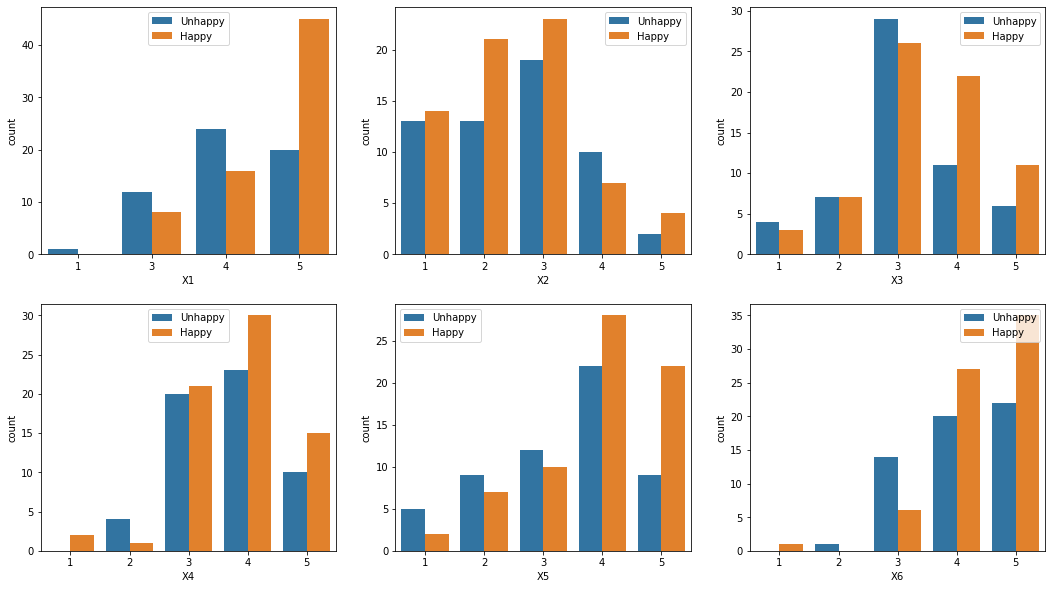

In [9]:
fig, axes = plt.subplots(2,3,figsize=(18,10))
axes = [plot for row in axes for plot in row]
#plt.legend(labels=['Unhappy', 'Happy'])
for ind, feature in enumerate (['X1', 'X2', 'X3', 'X4', 'X5', 'X6']):
    sns.countplot(x=df[feature], hue=df['Y'], ax=axes[ind])
    axes[ind].legend(labels=['Unhappy', 'Happy'])

In [10]:
# Description of statistical information
# y mean = 54.7% , this means that slightly more customers are happy than sad

# x1 mean = 4.3   x2 mean = 2.5   x3 mean = 3.3  x5 mean = 3.6    x6 mean = 4.2

# x1 top 75% = 5.0, 25% = 4.0   This means that x1 scores are mostly between 4 and 5
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df = df.rename(columns={"Score": "Y"})


<AxesSubplot:xlabel='X1'>

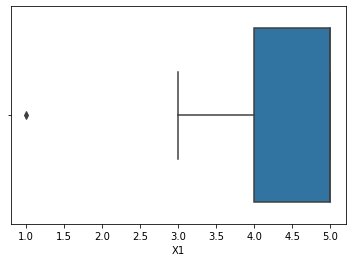

In [12]:
#X1 boxplot showing a score leaning towards 4.0 and 5.0
sns.boxplot(x=df['X1'])

<AxesSubplot:xlabel='X2'>

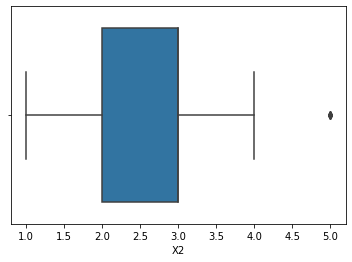

In [13]:
#x2 boxplot showing scores between 2.0 and 3.0
sns.boxplot(x=df['X2'])

<AxesSubplot:xlabel='X3'>

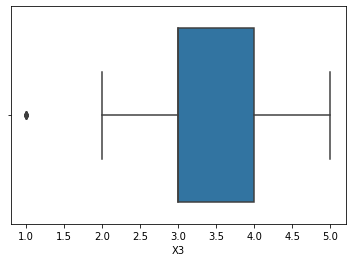

In [14]:
#x3 boxplot showing score between 3.0 and 4.0
sns.boxplot(x=df['X3'])

<AxesSubplot:xlabel='X4'>

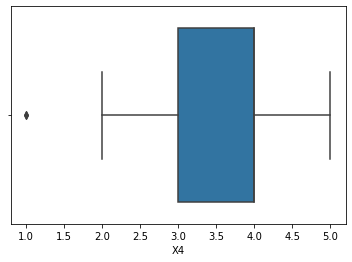

In [15]:
#x4 boxplot showing scores between 3.0 and 4.0
sns.boxplot(x=df['X4'])

<AxesSubplot:xlabel='X5'>

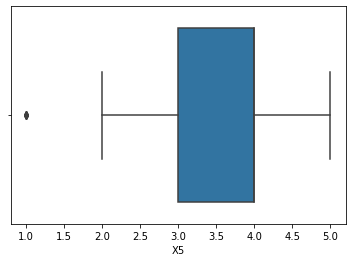

In [16]:
#x5 boxplot showing scores between 3.0 and 4.0
sns.boxplot(x=df['X5'])

<AxesSubplot:xlabel='X6'>

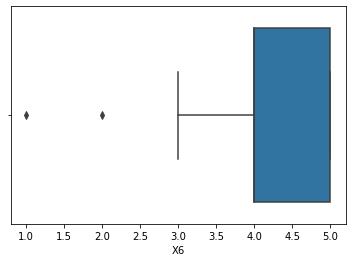

In [17]:
#x6 boxplot showing scores between 4.0 and 5.0. 
sns.boxplot(x=df['X6'])

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


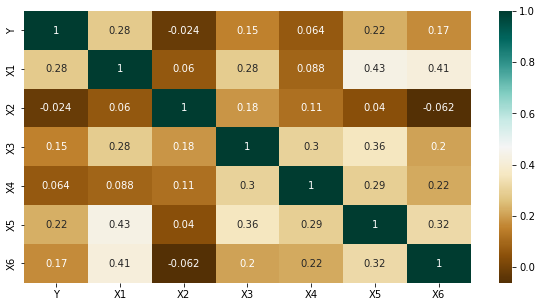

In [18]:
#Heatmap, relations between variables

#x1 to x2 = .06 correlation       #x2 to x3 =  .18     #x3 to x4 =   .3      #x4 to x5 = .29        #x5 to x6 = .32     
#x1 to x3=  .28 correlation       #x2 to x4 =  .11     #x3 to x5 =   .36     #x4 to x6 = .22                                           
#x1 to x4=  .088 correlation      #x2 to x5 =  .04     #x3 to x6 =   .2                             
#x1 to x5=  .43 correlation       #x2 to x6 = -.062    
#x1 to x6=  .41 correlation        


plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [19]:
df["X1"].value_counts()


5    65
4    40
3    20
1     1
Name: X1, dtype: int64

In [20]:
df["X2"].value_counts()


3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64

In [21]:

df["X3"].value_counts()

3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64

In [22]:
df["X4"].value_counts()

4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64

In [23]:
df["X5"].value_counts()

4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64

In [24]:
df["X6"].value_counts()

5    57
4    47
3    20
2     1
1     1
Name: X6, dtype: int64

In [25]:
import sys
!{sys.executable} -m pip install xgboost

In [26]:
#import libraries for training and testing several ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [27]:
#Define a function to sequentially test Logistic Regression, Support Vector, Random Forest Classifier and XG Boost Classifier
# models

def model_sequence(df, rand_state):
    """ 
    Input: Dataframe, random state for train-test split
    Output : Dataframe containining training and testing accuracy scores, precision, recall and f1-score
    Output : Feature importances for the Random Forest and XG Boost models
    """
    X = df.drop('Y', axis=1)
    y = df.Y
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = rand_state)

    score_dict = {'Logistic Regression':{},
                  'Support Vector':{},
                  'Random Forest':{}, 
                  'XG Boost':{}
                 }
    
    def score_dict_edit (key, ML_model):
        ML_model.fit(X_train, y_train)
        train_pred = ML_model.predict(X_train)
        test_pred = ML_model.predict(X_test)
        score_dict[key]['Train Accuracy'] = accuracy_score(y_train, train_pred)
        score_dict[key]['Test Accuracy'] = accuracy_score(y_test, test_pred)
        score_dict[key]['Precision GP 0'] = precision_score(y_test, test_pred, average=None)[0]
        score_dict[key]['Precision GP 1'] = precision_score(y_test, test_pred, average=None)[1]
        score_dict[key]['Recall GP 0'] = recall_score(y_test, test_pred, average=None)[0]
        score_dict[key]['Recall GP 1'] = recall_score(y_test, test_pred, average=None)[1]
        score_dict[key]['F1 Score GP 0'] = f1_score(y_test, test_pred, average=None)[0]
        score_dict[key]['F1 Score GP 1'] = f1_score(y_test, test_pred, average=None)[1]


    # create objects for the ML models to be tested 
    model_logreg = LogisticRegression(max_iter=1000, C=1)
    model_SVC=SVC(kernel='rbf', C=5, gamma='auto')
    model_rfc = RandomForestClassifier(n_estimators = 200)
    model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, learning_rate=0.5, max_depth=5)

    models=[model_logreg, model_SVC, model_rfc, model_xgb]

    for model in models:

        if model==model_logreg:
            score_dict_edit ('Logistic Regression', model_logreg)
        elif model==model_SVC:
            score_dict_edit ('Support Vector', model_SVC)
        elif model==model_rfc:
            score_dict_edit ('Random Forest', model_rfc)
        else:
            score_dict_edit ('XG Boost', model_xgb)
    df_metrics=pd.DataFrame(score_dict).transpose()
    rfc_imp = pd.DataFrame({'Feature':X.columns, 'Importance':model_rfc.feature_importances_}).sort_values(by='Importance', ascending=False)
    xgb_imp = pd.DataFrame({'Feature':X.columns, 'Importance':model_xgb.feature_importances_}).sort_values(by='Importance', ascending=False)
    return df_metrics, rfc_imp, xgb_imp

In [28]:
df_metrics, rfc_imp, xgb_imp = model_sequence(df, 5)

In [29]:
df_metrics

,Train Accuracy,Test Accuracy,Precision GP 0,Precision GP 1,Recall GP 0,Recall GP 1,F1 Score GP 0,F1 Score GP 1
Logistic Regression,0.659091,0.526316,0.428571,0.583333,0.3750,0.636364,0.400000,0.608696
Support Vector,0.829545,0.631579,0.583333,0.653846,0.4375,0.772727,0.500000,0.708333
Random Forest,0.943182,0.657895,0.615385,0.680000,0.5000,0.772727,0.551724,0.723404
XG Boost,0.931818,0.578947,0.500000,0.625000,0.4375,0.681818,0.466667,0.652174


In [30]:
rfc_imp

,Feature,Importance
1,X2,0.213869
4,X5,0.210036
2,X3,0.182676
0,X1,0.140330
5,X6,0.127447
3,X4,0.125641


In [31]:
#Checking feature importance in the XG Boost Model
xgb_imp

,Feature,Importance
2,X3,0.200417
4,X5,0.200328
0,X1,0.176122
1,X2,0.173256
3,X4,0.136417
5,X6,0.113461


In [32]:
df2 = df.drop(['X6'], axis=1)
# Drop X6 (usefulness of the app), appears to be the least important feature.
# Create a new dataframe df2 with just the single feature X6 being droppped

In [33]:
df_metrics2, rfc_imp2, xgb_imp2 = model_sequence(df2, 3)

In [34]:
df_metrics2

,Train Accuracy,Test Accuracy,Precision GP 0,Precision GP 1,Recall GP 0,Recall GP 1,F1 Score GP 0,F1 Score GP 1
Logistic Regression,0.534091,0.657895,0.700000,0.642857,0.411765,0.857143,0.518519,0.734694
Support Vector,0.795455,0.578947,0.533333,0.608696,0.470588,0.666667,0.500000,0.636364
Random Forest,0.886364,0.736842,0.818182,0.703704,0.529412,0.904762,0.642857,0.791667
XG Boost,0.886364,0.763158,0.750000,0.772727,0.705882,0.809524,0.727273,0.790698


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
X = df2.drop('Y', axis=1)
y = df2.Y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 5)

In [37]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [38]:
params = { 'max_depth': [3,5, 6],
           'learning_rate': [0.01, 0.5, 0.6, 0.7],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.7, 0.8, 0.9]}

clf = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X,y)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
xgb2.fit(X_train, y_train)

In [ ]:
xgb2.predict(X_train, y_train)

In [ ]:
#train a new xgb model with the best parameters
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 3, n_estimators = 100)

In [ ]:
#the 'best parameters' did not yield metrics better than what worked with this model previously. Why is that?
pred = xgb2.predict(X_test) #accuracy was not able to go over 76%
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred)) #The user found the learning rate .01, max-depth 3, n_estimators:100 as the best parameters.

In [ ]:
#Concluding Remarks:
#The user found the learning rate .01, max-depth 3, n_estimators:100 as the best parameters.
#accuracy was not able to go over 76%. The accuracy is not able to be improved.
#XG Boost fares better than a Random Forest model for this specific dataset in predicting customer happiness. X6 (the app makes ordering easy for me) can be excluded in the future from the questionnaire. 